In [ ]:
#ячейка для импорта
import pandas as pd
import numpy as np
import sklearn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import scipy.stats as stats
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_mat = pd.read_csv('student-mat.csv')
df_por = pd.read_csv('student-por.csv')
df_mat['alc_consumption'] = (0.5*df_mat['Dalc'] + 0.5*df_mat['Walc'])
df_mat.drop(['Walc', 'Dalc'], axis=1, inplace=True)
df_por['alc_consumption'] = (0.5*df_por['Dalc'] + 0.5*df_por['Walc'])
df_por.drop(['Walc', 'Dalc'], axis=1, inplace=True)

In [ ]:
numeric_features = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']
categorical_features = [ 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

model_mat = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
model_por = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
model_combined = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
y_mat = df_mat['alc_consumption']
X_mat = df_mat.drop('alc_consumption', axis=1)
y_por = df_por['alc_consumption']
X_por = df_por.drop('alc_consumption', axis = 1)

model_mat.fit(X_mat, y_mat)
model_por.fit(X_por, y_por)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'traveltime',
                                                   'studytime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'health',
                                                   'absences']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'reason',
                                                   'guardian', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic'])])),
                ('model', LinearRegression())])

In [ ]:
df_combined = pd.concat([df_mat, df_por], axis=0)
y_combined = df_combined['alc_consumption']
X_combined = df_combined.drop('alc_consumption', axis=1)
model_combined.fit(X_combined, y_combined)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'traveltime',
                                                   'studytime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'health',
                                                   'absences']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'reason',
                                                   'guardian', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic'])])),
                ('model', LinearRegression())])

In [ ]:
predicted_values = model_mat.predict(X_mat)
residuals = y_mat - predicted_values
rss_mat = sum(residuals**2)

predicted_values = model_por.predict(X_por)
residuals = y_por - predicted_values
rss_por = sum(residuals**2)

predicted_values = model_combined.predict(X_combined)
residuals = y_combined - predicted_values
rss_combined = sum(residuals**2)

In [ ]:
k = len(X_combined.columns)
n = X_combined.shape[0]
F_stat = ((rss_combined - (rss_mat+rss_por)) / (k+1)) / ( (rss_por+rss_mat)/( n - 2*(k+1)) )
print(F_stat)

0.5614990380578739


In [ ]:
alpha = 0.05
critical_value = stats.f.ppf(1 - alpha, k, n - 2 * (k+1))
if F_stat > critical_value:
    print("Reject the null hypothesis: There is a significant difference between regressions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between regressions.")


Fail to reject the null hypothesis: There is no significant difference between regressions.


(array([391., 182., 159., 118.,   0.,  85.,  49.,  26.,  10.,  24.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

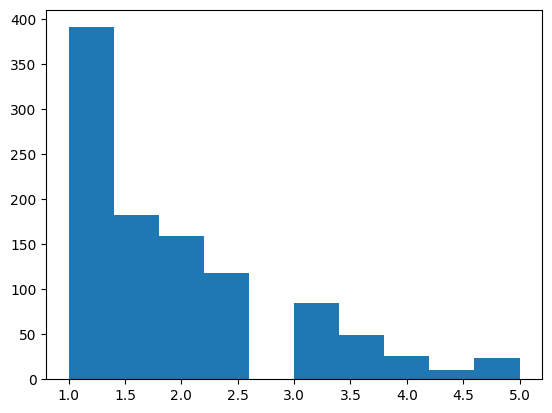

In [ ]:
plt.hist(df_combined['alc_consumption'])

(array([391.,   0., 182.,   0., 159., 118.,  85.,  49.,  26.,  34.]),
 array([0.        , 0.16094379, 0.32188758, 0.48283137, 0.64377516,
        0.80471896, 0.96566275, 1.12660654, 1.28755033, 1.44849412,
        1.60943791]),
 <BarContainer object of 10 artists>)

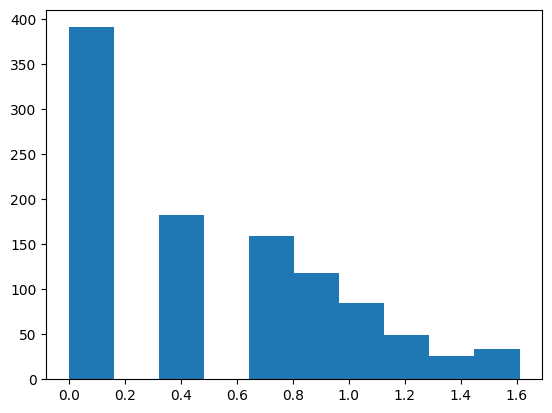

In [ ]:
plt.hist(np.log(df_combined['alc_consumption']))

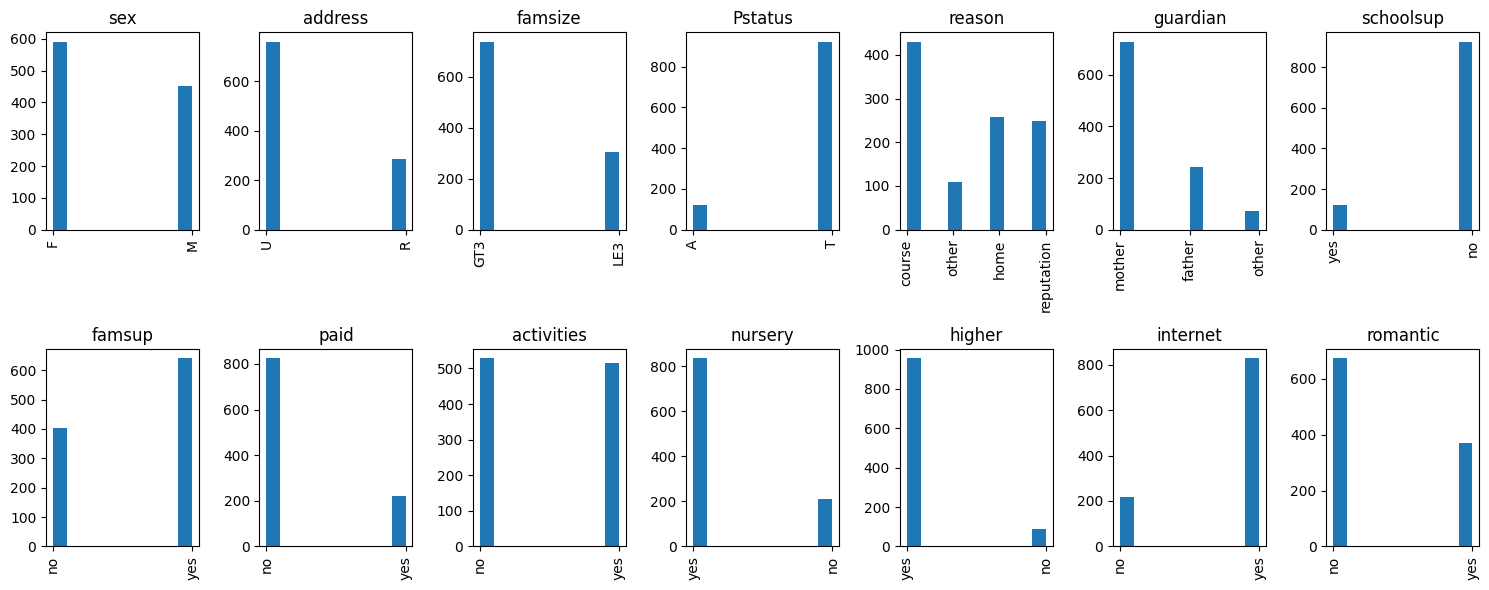

In [ ]:
n_rows = -(-len(categorical_features) // 7)  # Округление вверх
n_cols = 7

plt.figure(figsize=(15, 3 * n_rows))
for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    plt.title(feature)
    plt.hist(df_combined[feature])
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()  #

In [ ]:
len(categorical_features)

14

['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'alc_consumption']


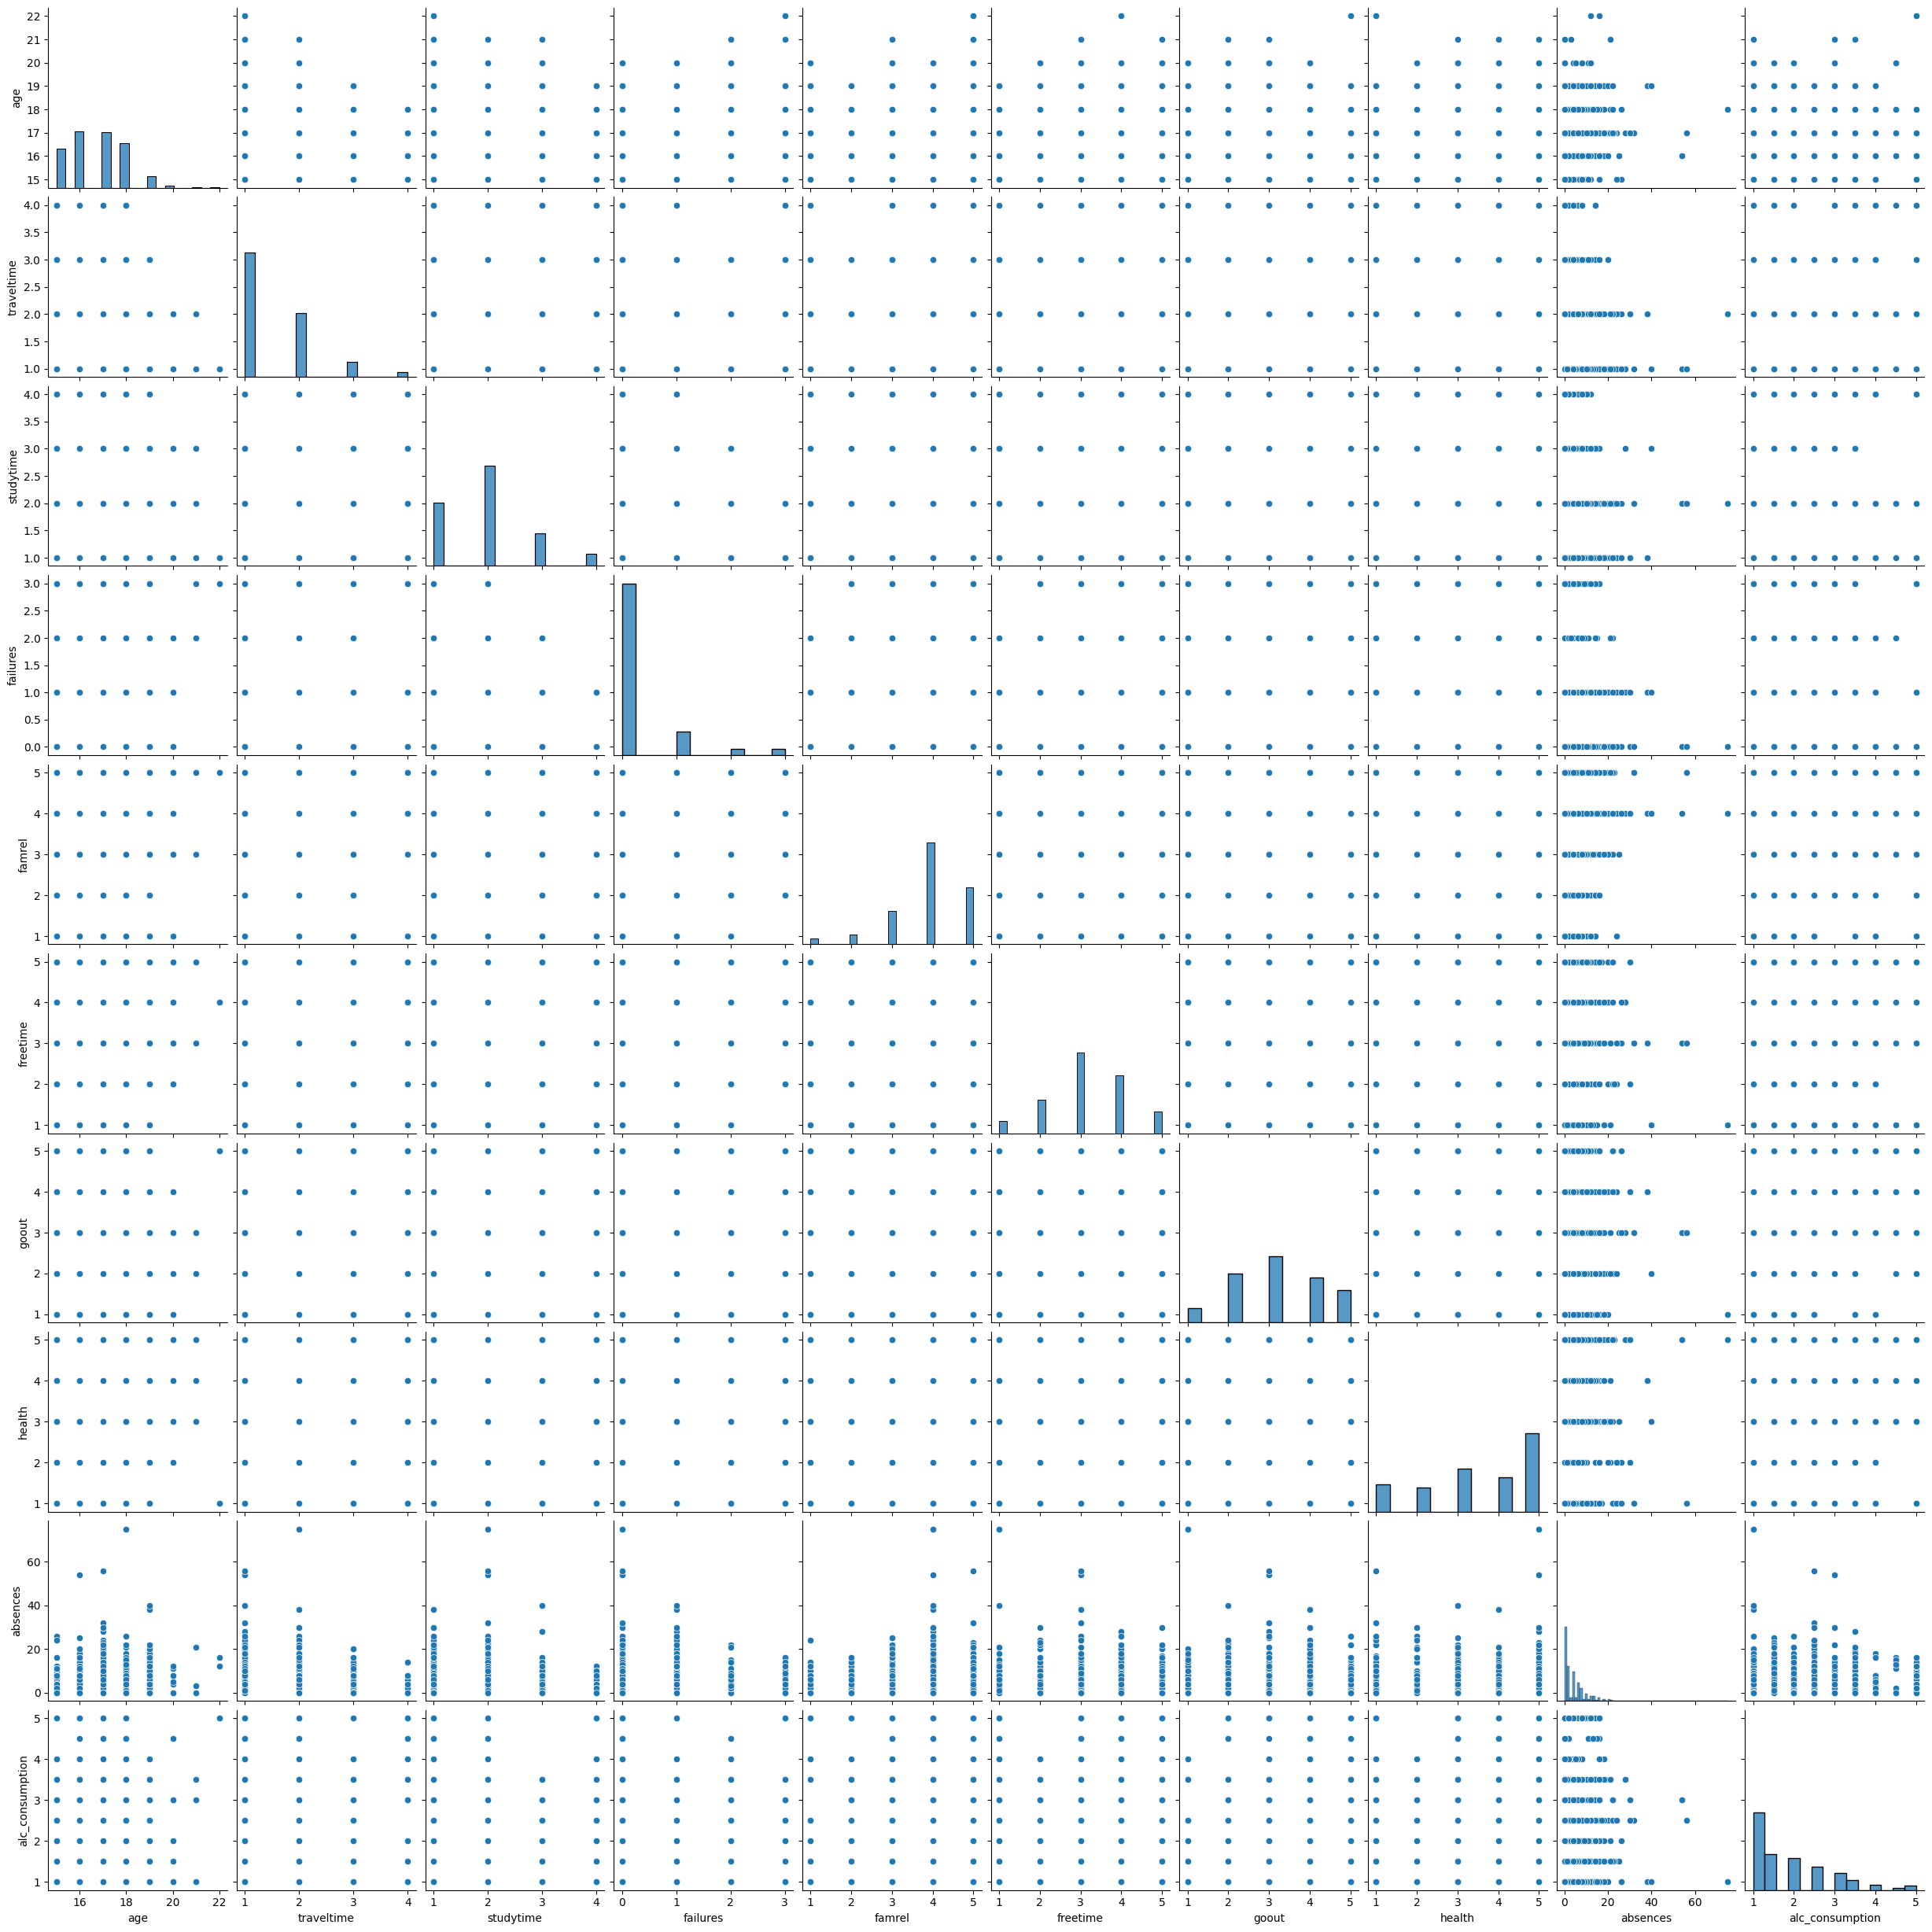

In [ ]:
features = numeric_features.copy()
features.append('alc_consumption')
print(features)
sns.pairplot(df_combined[features])
plt.show()

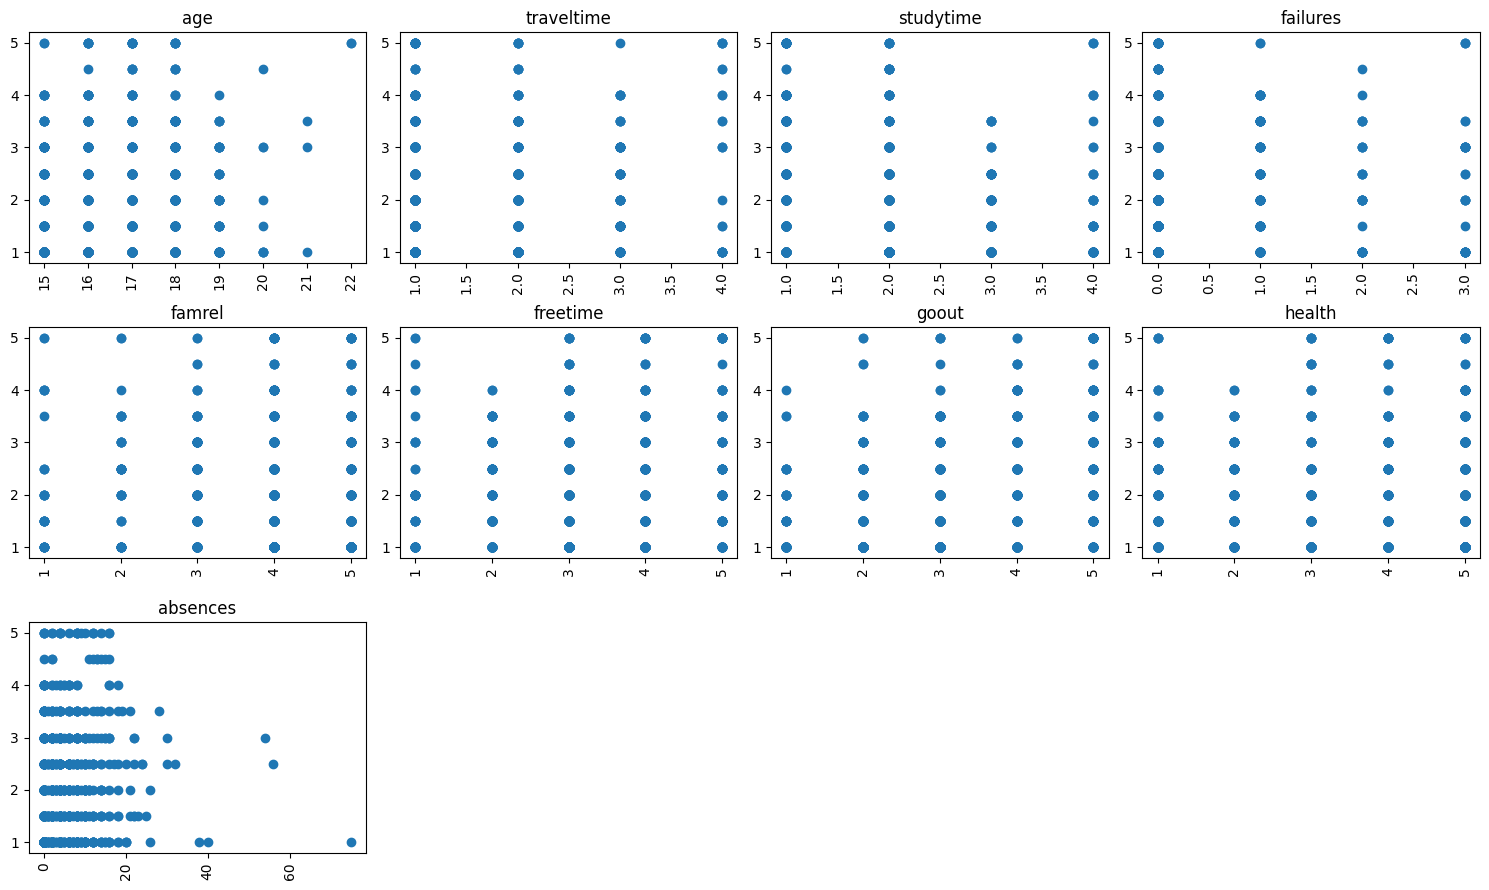

In [ ]:
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

plt.figure(figsize=(15, 3 * n_rows))
for idx, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    plt.title(feature)
    plt.scatter(df_combined[feature], df_combined['alc_consumption'])
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

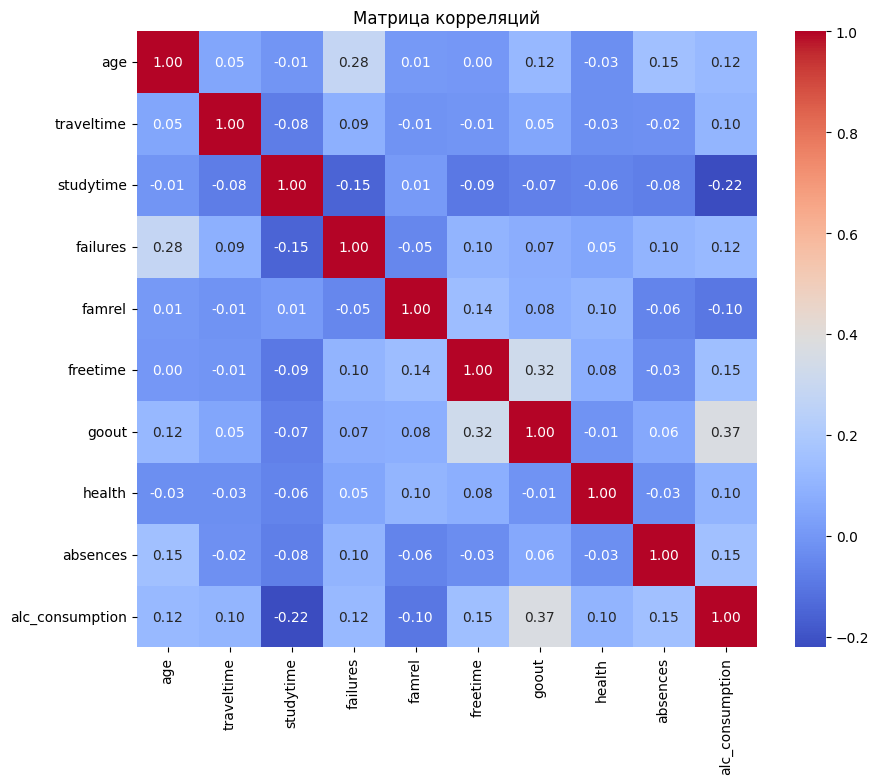

In [ ]:
correlation_matrix = df_combined[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()


In [ ]:
df_for_corr = df_combined[categorical_features]
label_encoders = {}
for column in df_for_corr.columns:
    le = LabelEncoder()
    df_for_corr[column] = le.fit_transform(df_for_corr[column])
    label_encoders[column] = le

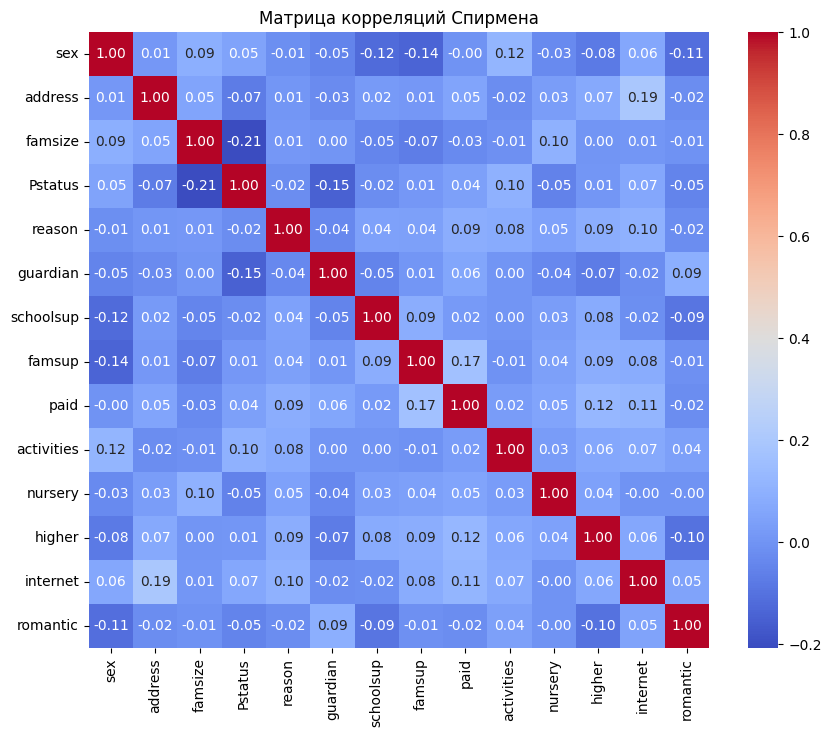

In [ ]:
correlation_matrix_spearman = df_for_corr.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций Спирмена")
plt.show()

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_combined)
X_train_sm = sm.add_constant(X_train_transformed)

model = sm.OLS(y_combined, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        alc_consumption   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     19.29
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.91e-71
Time:                        09:06:59   Log-Likelihood:                -1265.6
No. Observations:                1044   AIC:                             2585.
Df Residuals:                    1017   BIC:                             2719.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7904      0.165     10.878      0.0

In [ ]:
summary = model.summary()
with open('model_summary.txt', 'w') as f:
    f.write(summary.as_text())
from google.colab import files
files.download('model_summary.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

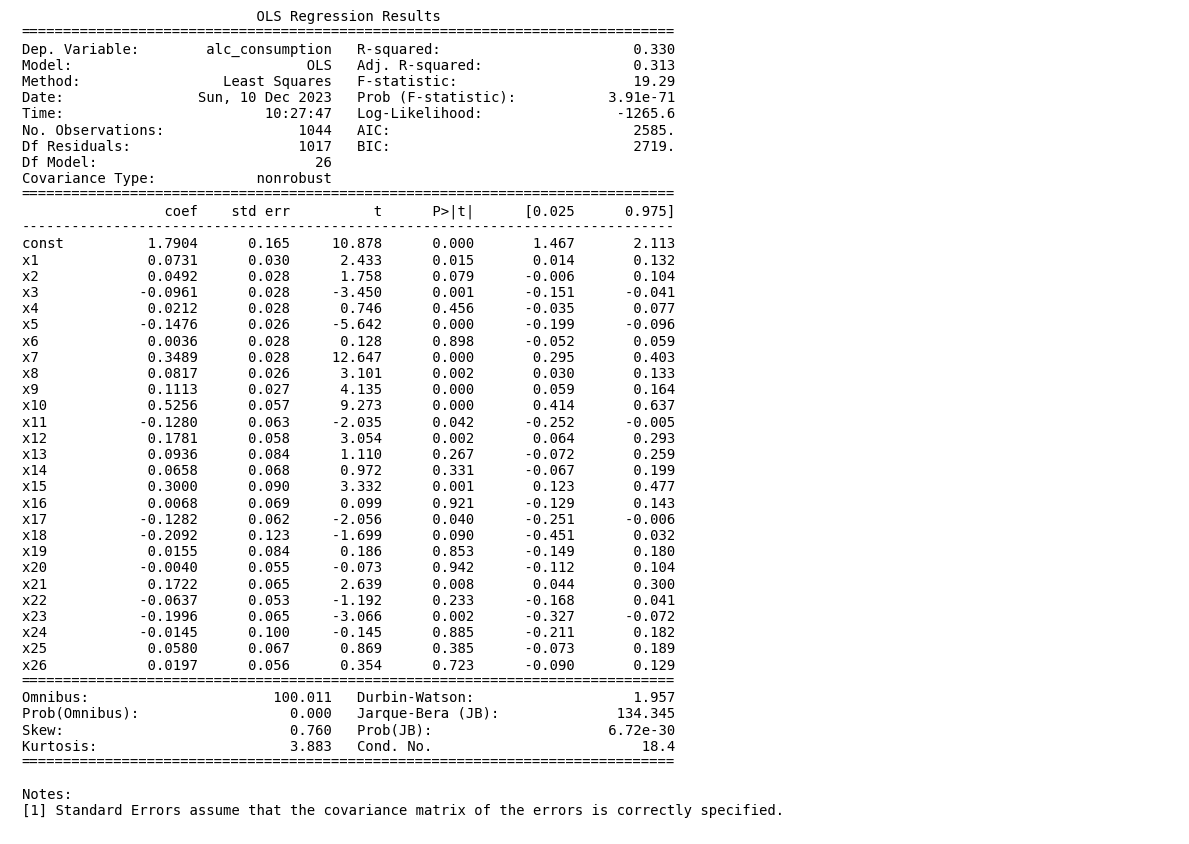

In [ ]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('model_summary.png')

In [ ]:
ohe_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_column_names)

for k in range(len(all_feature_names)):
  print(f'{k+1} --- {all_feature_names[k]}')

1 --- age
2 --- traveltime
3 --- studytime
4 --- failures
5 --- famrel
6 --- freetime
7 --- goout
8 --- health
9 --- absences
10 --- sex_M
11 --- address_U
12 --- famsize_LE3
13 --- Pstatus_T
14 --- reason_home
15 --- reason_other
16 --- reason_reputation
17 --- guardian_mother
18 --- guardian_other
19 --- schoolsup_yes
20 --- famsup_yes
21 --- paid_yes
22 --- activities_yes
23 --- nursery_yes
24 --- higher_yes
25 --- internet_yes
26 --- romantic_yes


## Статистически Значимые Коэффициенты

На основе результатов регрессии OLS, следующие коэффициенты являются статистически значимыми (p < 0.05):

1. **age (x1)**:
   - Коэффициент: `0.0731`
   - P-значение: `0.015`

2. **studytime (x3)**:
   - Коэффициент: `-0.0961`
   - P-значение: `0.001`

3. **famrel (x5)**:
   - Коэффициент: `-0.1476`
   - P-значение: `<0.001`

4. **goout (x7)**:
   - Коэффициент: `0.3489`
   - P-значение: `<0.001`

5. **health (x8)**:
   - Коэффициент: `0.0817`
   - P-значение: `0.002`

6. **absences (x9)**:
   - Коэффициент: `0.1113`
   - P-значение: `<0.001`

7. **sex_M (x10)**:
   - Коэффициент: `0.5256`
   - P-значение: `<0.001`

8. **address_U (x11)**:
   - Коэффициент: `-0.1280`
   - P-значение: `0.042`

9. **famsize_LE3 (x12)**:
   - Коэффициент: `0.1781`
   - P-значение: `0.002`

10. **reason_other (x15)**:
    - Коэффициент: `0.3000`
    - P-значение: `0.001`

11. **guardian_mother (x17)**:
    - Коэффициент: `-0.1282`
    - P-значение: `0.040`

12. **paid_yes (x21)**:
    - Коэффициент: `0.1722`
    - P-значение: `0.008`

13. **nursery_yes (x23)**:
    - Коэффициент: `-0.1996`
    - P-значение: `0.002`


In [ ]:
X_combined[numeric_features].describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,3.543103,4.434866
std,1.239975,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,1.424703,6.210017
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [ ]:
descriptive_stats = X_combined[numeric_features].describe()

descriptive_stats.to_excel('descriptive_stats.xlsx')
files.download('descriptive_stats.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>